<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Прошу прощения за задержку ревью 🙏 Понимаю, что это принесло много неудобств, но скоро все будет в норме. 
    
    
    
Меня зовут Светлана Носова, я буду проверять твой проект. Если не против, давай общаться на «ты». Если тебе такой стиль общения не нравится, напиши об этом, будем на «вы».

Сразу хочу обратить внимание на цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
Кроме того, комментарии у меня обозначены как заголовки. Это сбивает содержание, но при последующей проверке я могу снять с них заголовок, если тебе так будет удобнее. При этом они удобны, поскольку ты сразу можешь перейти к ним.   
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> работа очень объемная и непростая, ты молодец. На первый взгляд, все сделано очень старательно. Однако полноценную проверку я провести не могу, т.к. указан локальный путь к файлу. Исправь, пожалуйста. 
    

</div>    


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 2</b>
    
Спасибо за корректировки. Я оставила новые комментарии с цифрой 2, а со старых сняла заголовки, чтобы  не мешали. Несколько вопросов есть, много времени исправления занять не должны. 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 3</b>
    
Очень хорошая работа. Один вопрос всего остался.</div>
<hr>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 4</b>
    
Год размещения для центра не рассмотрен.</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир-" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование объявлений о продаже квартир <a id="title"></a></a></span></li><li><span><a href="#Изучение-данных-из-файла-" data-toc-modified-id="Изучение-данных-из-файла--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла <a id="file"></a></a></span></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных-" data-toc-modified-id="Предобработка-данных--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных <a id="preprocessing"></a></a></span><ul class="toc-item"><li><span><a href="#Удаление-столбцов" data-toc-modified-id="Удаление-столбцов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Удаление столбцов<a id="delete"></a></a></span></li><li><span><a href="#Замена-пропущенных-значений-" data-toc-modified-id="Замена-пропущенных-значений--4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Замена пропущенных значений <a id="chanching"></a></a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span><ul class="toc-item"><li><span><a href="#Изменение-даты-" data-toc-modified-id="Изменение-даты--5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Изменение даты <a id="date"></a></a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных-" data-toc-modified-id="Замена-типов-данных--6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Замена типов данных <a id="type_change"></a></a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу-" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу <a id="new_columns"></a></a></span></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span></li><li><span><a href="#Исследовательский-анализ-данных-" data-toc-modified-id="Исследовательский-анализ-данных--9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Исследовательский анализ данных <a id="analyze"></a></a></span><ul class="toc-item"><li><span><a href="#Первоначальная-оценка-" data-toc-modified-id="Первоначальная-оценка--9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Первоначальная оценка <a id="preanalyze"></a></a></span></li><li><span><a href="#Построение-гистограмм--(площадь,-цена,-число-комнат,-высота-потолков)" data-toc-modified-id="Построение-гистограмм--(площадь,-цена,-число-комнат,-высота-потолков)-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Построение гистограмм <a id="diagram"></a> (площадь, цена, число комнат, высота потолков)</a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--10"><span class="toc-item-num">10&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--11"><span class="toc-item-num">11&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span><ul class="toc-item"><li><span><a href="#Время-продажи-квартиры-" data-toc-modified-id="Время-продажи-квартиры--11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Время продажи квартиры <a id="sell_time"></a></a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--12"><span class="toc-item-num">12&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span><ul class="toc-item"><li><span><a href="#Зависимость-стоимости-" data-toc-modified-id="Зависимость-стоимости--12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Зависимость стоимости <a id="price_depended"></a></a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--13"><span class="toc-item-num">13&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span></li><li><span><a href="#-Комментарий-ревьюера-3-✔️-" data-toc-modified-id="-Комментарий-ревьюера-3-✔️--14"><span class="toc-item-num">14&nbsp;&nbsp;</span> Комментарий ревьюера 3 ✔️ </a></span></li><li><span><a href="#-Комментарий-ревьюера--3-✔️" data-toc-modified-id="-Комментарий-ревьюера--3-✔️-15"><span class="toc-item-num">15&nbsp;&nbsp;</span> Комментарий ревьюера  3 ✔️</a></span><ul class="toc-item"><li><span><a href="#Зависимость-стоимости-от-удалености-к-центру-" data-toc-modified-id="Зависимость-стоимости-от-удалености-к-центру--15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Зависимость стоимости от удалености к центру <a id="price_depended_centre"></a></a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера--3-✔️" data-toc-modified-id="-Комментарий-ревьюера--3-✔️-16"><span class="toc-item-num">16&nbsp;&nbsp;</span> Комментарий ревьюера  3 ✔️</a></span></li><li><span><a href="#-Комментарий-ревьюера--3-✔️" data-toc-modified-id="-Комментарий-ревьюера--3-✔️-17"><span class="toc-item-num">17&nbsp;&nbsp;</span> Комментарий ревьюера  3 ✔️</a></span></li><li><span><a href="#-Комментарий-ревьюера-4-❌" data-toc-modified-id="-Комментарий-ревьюера-4-❌-18"><span class="toc-item-num">18&nbsp;&nbsp;</span> Комментарий ревьюера 4 ❌</a></span><ul class="toc-item"><li><span><a href="#Ликвидность-квартир-в-центре-" data-toc-modified-id="Ликвидность-квартир-в-центре--18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>Ликвидность квартир в центре <a id="liquid_centre"></a></a></span></li></ul></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Общий вывод <a id="conlusion"></a></a></span></li><li><span><a href="#Чек-лист-готовности-проекта-" data-toc-modified-id="Чек-лист-готовности-проекта--20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Чек-лист готовности проекта <a id="check_list"></a></a></span></li></ul></div>

0. [Исследование объявлений о продаже квартир](#title)
1. [Изучение данных из файла](#file)
2. [Предобработка](#preprocessing)
>- [Удаление лишних столбцов](#delete) 
>- [Замена пропущенных значений](#chanching) 
>- [Изменение даты](#date)
>- [Замена типов данных](#type_change)
3. [Расчёты и добавление результатов в таблицу](#new_columns)
4. [Исследовательский анализ данных](#analyze)
>- [Первоначальная оценка](#preanalyze)
>- [Построение диаграмм(площадь, цена, число комнат, высота потолков)](#diagram)
>- [Время продажи квартиры](#sell_time)
>- [Зависимость стоимости](#price_depended)
>- [Зависимость стоимости от удаленности от центра](#price_depended_centre)
>- [Ликвидность квартир в центре](#liquid_centre)
5. [Общий вывод](#conlusion)
6. [Чек лист](#check_list)

## Исследование объявлений о продаже квартир <a id="title"></a>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Здорово, что добавляешь краткое описание задачи и содержание.     
</div>

[Вернуться к содержанию](#main_title)

## Изучение данных из файла <a id="file"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from random import randint

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError as e:
    print(e)
    df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()

[Errno 2] No such file or directory: '/datasets/real_estate_data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️ </b>
    
Классно, что используешь `try-except`. Иногда полезны `else` и `finally`. Так, `try` блок позволяет нам что-то попытаться сделать. `except` ловит исключения и ошибки. `else` делает что-то, если ошибок не было. `finally` выполняется всегда, даже если бы ошибка. `finally` может быть полезен, когда тебе точно надо что-то сделать. Например, закрыть файл. Глянь на кусок кода ниже:
    
   
</div>

```python

try:
    # Что-то делаем.
except Exception as e:
    # Обрабатываем исключение.
    # То есть мы ожидаем, что может случиться ошибка.
else:
    # Выполянем что-то, если нет ошибок.
finally:
    # Выполянем что-то при любом раскладе.
    
```

<span style="color:orange"> Спасибо! буду знать. причем еще интересный способ вставлять python-код в markdown </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Jupyter вообще очень классная штука. Тут и формулы можно прописывать: $\int\left(\frac{dP}{dx}+\frac{dQ}{dy}+\frac{dR}{dz}\right)\omega=\int(P\cos\alpha+Q\cos\beta+R\cos\gamma)s$ 😊 
    
    
   
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Локальный путь. Не забывай перепроверять перед отправкой. Если ты заметил, что отправил что-то не то, всегда можно попросить через куратора, чтобы работу вернули обратно. 
</div>

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


In [5]:
# Проверка различных значений.
df.columns
df['studio'].value_counts()
df['rooms'].value_counts()
df['is_apartment'].value_counts()
len(df[df['airports_nearest'] == 0])
len(df[df['parks_around3000'] == 0])
df['locality_name'].value_counts()
df[df.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Вывод

1. `total_images` - число фото. в исследовании не понадобится. удалеяем
1. `last_price` - цена на момент снятия с публикации. нулей нет, пропусков нет. параметр ключевой
1. `total_area` - нулей нет, пропусков нет. параметр ключевой
1. `first_day_exposition` - дата публикации. надо привести в формат даты
1. `rooms` - есть нули, но они стоят там где либо студия, либо открытая планировка. поэтому оставляем нули. т.к. есть свободная планировка, то судя по всему есть квартиры без отделки... очень жаль что это никак не отображено в таблице, т.к. очень важный параметр для стоимости
1. `ceiling_height` высота потолков. многовато пропусков(см. вывод 1 в этом markdown)
1. `floors_total` попробуем реализовать замену пропусков по поиску аналогичных домов(расстояние аэропорт и центр питера), т.к. параметр в дальнейшим понадобится. Спойлер: идея косячная. сделал по другому
1. `living_area` жилая площадь. поставим (среднюю площадь*общую площадь)
1. `floor` - этаж 
1. `is_apartment` всег 50 значений да, есть подозрение, что в России слово аппартаменты не особ в ходу. столбец интереса не представляет. удаляем его.
1. `studio` - значений не много и есть кой какой разнобой в кол-ве комнат, где то ноль где то 1 указана, думаю правильнее заменить значения rooms = 0, а саму колонку удалить.
1. `open_plan` - такая же история как со студией, т.к. по сути является студией без отделки...
1. `kitchen_area` поставим (среднюю площадь*общую площадь)
1. `balcony` (см. вывод 2 в этом markdown)
1. `locality_name` логика как с потолками не пройдет. как правило пропущены значения расстояние до города, расстояние до центра. значение довольно много поэтому правильнее маленькие поселки сгруппировать в "другие"
1. `airports_nearest` - для каких то поселков можно заполнить значения по среднему для данного поселка, но смысла не вижу, все пропуски не удалить, такая же история со всеми данными которые завязаны на расстоянии
1. `cityCenters_nearest`
1. `parks_around3000`
1. `parks_nearest`
1. `ponds_nearest`
1. `ponds_around3000`
1. `days_exposition` - правильнее перевести в значение int... есть пропуски, возможно связано с тем что на момент выгрузки объявление было актуально...

---  

Вывод 1: была идея заполнить пропуски в высоте потолков/общем кол-ве этажей путем: найти эти дома по совпадающим расстояниям до центра/аэропорта, но пробежав глазами таблицу, пропуски могут быть и там и там... другой логики заполнения пропусков не вижу.

Вывод 2: первоначально была мысль, что люди не указывали, потому что балконов нет, но т.к. отсутствует балконы даже в квартирах 200+м то пропуски будем заполнять по такому принципу:
- ~~1.Найдем квартиру с минимальной площадью и 1 балконом. все пропуски с площадью меньше заменим нулями~~  
Данный пункт убрал т.к. обнаружил, что балконы бывают в квартирах даже 12м2(по циану)  
- 2.~~Далее разобьем площади на 10(число из головы) равных промежутков, и вставим кол-во балконов в зависимости от среднего, но т.к. балконов не может быть 0.47 , то будем вставлять рандомом)))~~  
В ходе исследования идея переигралась. см. [замена пропущенных значений](#chanching)
- а так вообще если бы не надо было менять пропуски то вообще не уверен что это нужно делать.

Вывод 3: Столбцы названы корректно, дубликатов нет

[Вернуться к содержанию](#main_title)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
- Потолки это довольно стандартизированная величина, поэтому можно безболезненно заменить их медианой. При желании можно также добавить группировку по населенному пункту, а для СПб — по расстоянию до центра.

    
- Пропуски в населенных пунктах можно даже удалить. Мы не можем быть уверены, что эти квартиры принадлежат Лен. области.


- По жилой площади и кухням можно попробовать такой вариант:
    
    
    1. Группируем по комнатам. 
    2. Для каждой группы вычисляем отношение медианы жилой площади к медиане общей. С кухней то же самое.
    3. Заполняем жилую также в группировке по комнатам, умножая общую площадь на полученный ранее коэффициент отношения. Кухню заполняем так же.
    
 </div>

## Предобработка данных <a id="preprocessing"></a>

### Удаление столбцов<a id="delete"></a>

In [6]:
# Функция для расстановки корректной расстановки кол-ва комнат
def check_studio(row):
    if row['studio'] or row['open_plan']:
        return 0
    else:
        return row['rooms']


# Код для проверки работоспособности функции:
columns_name = ['rooms', 'studio', 'open_plan']
data = [[1, True, False],
        [2, False, False],
        [3, False, True],
        [4, True, True],
        [5, False, False],
        [6, False, False],
        [0, False, False],
        [0, False, True]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['rooms'] = test_df.apply(check_studio, axis=1)
test_df

,rooms,studio,open_plan
0,0,True,False
1,2,False,False
2,0,False,True
3,0,True,True
4,5,False,False
5,6,False,False
6,0,False,False
7,0,False,True


In [7]:
df['rooms'] = df.apply(check_studio, axis=1)
df.drop(columns=['studio', 'open_plan', 'total_images', 'is_apartment'], inplace=True)

[Вернуться к содержанию](#main_title)

### Замена пропущенных значений <a id="chanching"></a>

In [8]:
# Убираем единственный дурацкий ноль в расстоянии до аэропорта
df['airports_nearest'] = df['airports_nearest'].replace(0, None)

In [9]:
# Нашли минимальный площадь квартиры с балконом
df[df['balcony']==1]['total_area'].min()

18.0

In [10]:
# Разбили площади на категории
df['balcony_category'] = pd.qcut(df['total_area'], q=10)

In [11]:
# Делаем две таблицы, 
# Первую со средним значением кол-во балконов если расставить нули в пропусках, 
# Вторую: если пропуски оставляем
df_balcony_zero = df.copy()
df_balcony_zero['balcony'] = df_balcony_zero['balcony'].fillna(0)
df_balcony_category_without_zero = df.pivot_table(
    index=['balcony_category'], aggfunc='mean', values='balcony')
df_balcony_category_zero = df_balcony_zero.pivot_table(
    index=['balcony_category'], aggfunc='mean', values='balcony')
df_balcony_category_zero['without_zero'] = df_balcony_category_without_zero['balcony']
df_balcony_category_zero


,balcony,without_zero
balcony_category,,
"(11.999, 33.0]",0.390282,0.833473
"(33.0, 37.6]",0.614687,1.128120
"(37.6, 42.0]",0.617794,1.145624
"(42.0, 46.0]",0.505239,0.981161
"(46.0, 52.0]",0.566487,1.073191
"(52.0, 58.0]",0.661414,1.235481
"(58.0, 64.8]",0.662298,1.233523
"(64.8, 75.0]",0.681235,1.313998
"(75.0, 93.52]",0.668301,1.341987


Ситуация не очень понятная что с пропусками... судя по кол-ву балконов при малых площадях больше похоже что пропуски возникают потому что при отсутствии балкона просто ничего не ставят, но вот квартиры от 93 метров практически половина "без балконов"... 
Наверно стоит переиграть первоначальную идею... просто заполнить нулями

In [12]:
df['balcony'] = df['balcony'].fillna(0) # Заполняем пропуски
df.drop(columns='balcony_category', inplace=True)  # Удаляем столбец, чтоб глаза не мазолил

In [13]:
# Создаем колонку, в которой кортеж Расстояние аэропорт/ Расстояние до центра
def distance_split(row):
    return (row['airports_nearest'], row['cityCenters_nearest'])


df['distance_for_floors'] = df.apply(distance_split, axis=1)


In [14]:
data_group = df.pivot_table(index=['distance_for_floors'], values=['floors_total'])

Идея провальная... на одном расстоянии находятся дома с разным количеством этажей. чудеса.
Переигрываем идею... так как данные нужны для первого/последнего этажа. то находим сколько % занимает верхние этажи из имеющихся данных
И с таким же процентом добавляем этажи относительно имеющегося.
Хотя пропусков на самом деле всего то 86, можно было и просто удалить...)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
- Описательные комментарии следует выносить в отдельные ячейки типа Markdown. Посмотри, как код в них теряется. Комментарии к коду должны быть лаконичными. Они отвечают на вопрос *Что делаем?*, а не *Почему?* или *Зачем?*. Комментируют код в сложных местах, примитивные вещи оставляют без комментариев. Либо оставляй комментарии в начале ячейки, так она будет выглядеть симпатичнее :)
    
    
    
-  
> на одном расстоянии находятся дома с разным количеством этажей. чудеса.
    
    
Почему? Дома иногда группами строят, а расстояние замеряют от центра двора. Или такое еще может быть:  
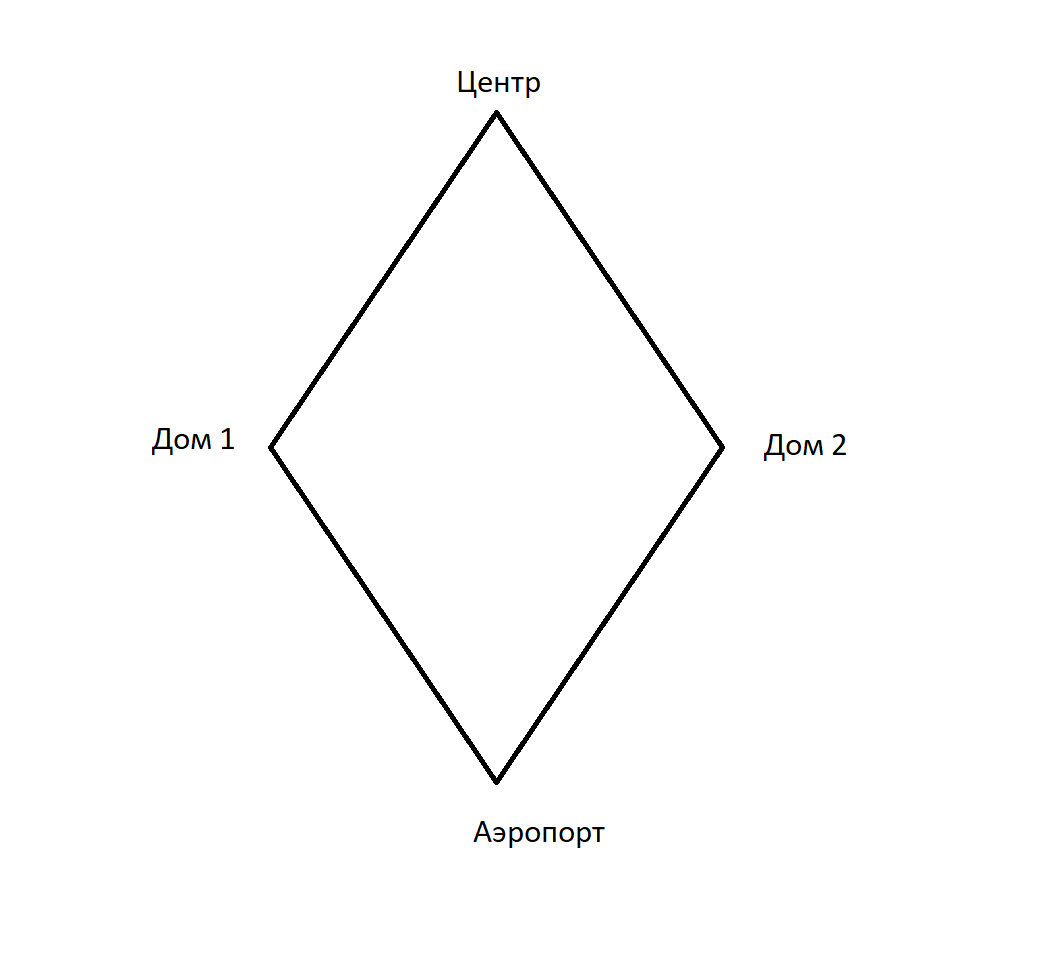    
</div>

<span style="color:orange"> переместил, про одинаковое расстояние: там бывает 3 и более вариантов этажности, поэтому чудеса </span>:

In [15]:
# Просто пример
df[['floors_total','cityCenters_nearest','airports_nearest']].query('cityCenters_nearest == 13205 and airports_nearest == 6989')

,floors_total,cityCenters_nearest,airports_nearest
5062,14.0,13205.0,6989.0
5074,25.0,13205.0,6989.0
10059,25.0,13205.0,6989.0
11294,14.0,13205.0,6989.0
15633,24.0,13205.0,6989.0
22283,14.0,13205.0,6989.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Да, тоже вариант. 
    
   
</div>

In [16]:
df.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'distance_for_floors'],
      dtype='object')

In [17]:
df.drop(columns='distance_for_floors', inplace=True) # Удаляем стобец который оказался не нужным
test_df = df.copy() # Копируем дф, чтою посмотреть что будет показывать без пропусков 
test_df.dropna(subset=['floors_total'], inplace=True)
test_df['floors_total'] = test_df['floors_total'].astype(int)
test_df['floor'] = test_df['floor'].astype(int)
len(test_df[df['floor'] == df['floors_total']])

C:\Users\Bacek\AppData\Local\Temp/ipykernel_10960/1793015234.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(test_df[df['floor'] == df['floors_total']])


3361

In [18]:
# Функция которая принимает строку df, если отсутствует значение общего кол-ва высоты здания, то с шансом соответствующим
# проценту последних этажей возвращает такое же количество этажей сколько в зданий, в противном случае прибавляет от одного до 5 этажей,
# можно было поставить сколько угодно, т.к. только именно факт последнего этажа играет в нашем ислледовании

def check_floor(row):
    if pd.notna(row['floors_total']):
        return row['floors_total']
    if random() > 3361/23613:
        return row['floor'] + randint(1,5)
    return row['floor']

# Проверка работспособности функции
columns_name = ['floor', 'floors_total']
data = [[1, 22],
        [2, 22],
        [3, 22],
        [4, None],
        [5, None],
        [6, 22],
        [1, None],
        [1, None]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['floors_total'] = test_df.apply(check_floor, axis=1)
df['floors_total'] = df.apply(check_floor, axis=1)

[Вернуться к содержанию](#main_title)

### Изменение даты <a id="date"></a>

In [19]:
# Сначало переводим формат obj в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1d')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
При чтении файла можно указать параметр **parse_dates**: `parse_dates=['first_day_exposition']`. Тогда пандас автоматически переведет список столбцов в даты.

</div>

<span style="color:orange"> Полезная функция, в тренажере об этом ни слова не было </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Да, ее не было в тренажере. Не воспринимай это как недостаток, нет. Просто нельзя все и сразу изучить, иначе голове будет трудно переваривать большой объем новой информации. 
    
   
</div>

[Вернуться к содержанию](#main_title)

### Замена типов данных <a id='type_change'></a>

Так как по большой части пропуски было решено оставить, то изменение типа не приведет ни к чему, останется тот же float  
Один из немногих пунктов который можно исправить: `balcony`

In [20]:
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
# df.info()

[Вернуться к содержанию](#main_title)

## Расчёты и добавление результатов в таблицу <a id="new_columns"></a>

In [21]:
# Добавляем цену квадратного метра
df['price_one_metr'] = df['last_price']/df['total_area']
# Добавляем день недели
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [22]:
# переименовываем в человеческий вид сразу
weekdays = {
    0 : 'понедельник',
    1 : 'вторник',
    2 : 'среда',
    3 : 'четверг',
    4 : 'пятница',
    5 : 'суббота',
    6 : 'воскресенье'
}
df['weekday_names'] = df['weekday'].map(weekdays)

In [23]:
# Функция для категоризации этажей
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Заключительный'
    return 'Другой'

# Проверка работоспособности функции
columns_name = ['floor','floors_total']
data=[
    [1,14],
    [22,25],
    [13,13]
]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['category_floor'] = test_df.apply(floor_type, axis=1)
# test_df


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
В будущем рекомендую использовать категории из ТЗ. Это может быть важно для заказчика. </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Хорошо :)     
   
</div>

<span style="color:orange"> Если это про "заключительный", то я суеверный и стараюсь избегать слова из ТЗ</span> 

In [24]:
df['category_floor'] = df.apply(floor_type, axis=1)

In [25]:
# Так как оставили пропуски в жилой площади и площади кухни, то высчитать простыи деленим соотношение нельзя
# Пишем соответствующую функцию
def function_closser(value):
    value = value
    def function_inside(row):
        nonlocal value
        if pd.isna(row[value]):
            return None
        return row[value] / row['total_area']
    return function_inside
  
kitchen = function_closser('kitchen_area')
living = function_closser('living_area')

# Проверка работоспособности функции
columns_name = ['total_area','kitchen_area','living_area']
data = [
    [100.0, 20, 30],
    [100, None, None],
    [100, None, 15.0],
    [100.0, 15.2, 16.2],
    [100.0, 14, None]
]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['kitch'] = test_df.apply(kitchen, axis=1)
test_df['liv'] = test_df.apply(living, axis=1)
test_df

,total_area,kitchen_area,living_area,kitch,liv
0,100.0,20.0,30.0,0.200,0.300
1,100.0,NaN,NaN,NaN,NaN
2,100.0,NaN,15.0,NaN,0.150
3,100.0,15.2,16.2,0.152,0.162
4,100.0,14.0,NaN,0.140,NaN


In [26]:
df['living_balance'] = df.apply(living, axis=1)
df['kitchen_balance'] = df.apply(kitchen, axis=1)

[Вернуться к содержанию](#main_title)

## Исследовательский анализ данных <a id="analyze"></a>

### Первоначальная оценка <a id='preanalyze'></a>

In [27]:
# Буду рад подсказки как вывести иначе describe на определенные столбцы
pivot = df['total_area'].describe()
for name in ['rooms', 'last_price', 'ceiling_height']:
    pivot = pd.concat([pivot, df[name].describe()],axis=1)
pivot

,total_area,rooms,last_price,ceiling_height
count,23699.000000,23699.000000,2.369900e+04,14504.000000
mean,60.348651,2.069328,6.541549e+06,2.771499
std,35.654083,1.079409,1.088701e+07,1.261056
min,12.000000,0.000000,1.219000e+04,1.000000
25%,40.000000,1.000000,3.400000e+06,2.520000
50%,52.000000,2.000000,4.650000e+06,2.650000
75%,69.900000,3.000000,6.800000e+06,2.800000
max,900.000000,19.000000,7.630000e+08,100.000000


Смотрим на столбцы внимательно и понимаем, что минимальная стоимость квартиры 12190... значение уникальное. стоит его удалить. 
Также проблема с высотами потолков надо заменить значение свыше 7.5 метров на None и менее 2метров.
19 комнат в квартире 370метров... поверим, может ранее была коммуналка

In [28]:
df = df.query('last_price > 13000' )

In [29]:
def check_height(row):
    if row < 7.5 and row > 2:
        return row

# Проверка работоспособности функции:
columns_name = ['ceiling_height', 'rooms']
data = [[None, 1], [1.2, 4], [3, 2], [5, 2], [8,3]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['ceiling_height'] = test_df['ceiling_height'].apply(check_height)
# test_df

In [30]:
df['ceiling_height'] = df['ceiling_height'].apply(check_height)

[Вернуться к содержанию](#main_title)

### Построение гистограмм <a id='diagram'></a> (площадь, цена, число комнат, высота потолков)

In [31]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

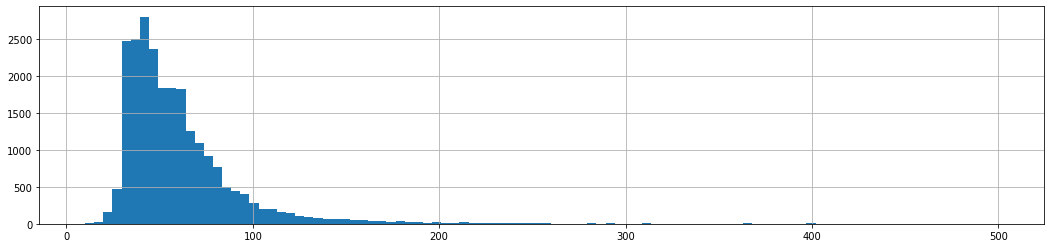

In [32]:
df['total_area'].hist(bins=100, range=(10, 500),figsize=(18,4))

<AxesSubplot:>

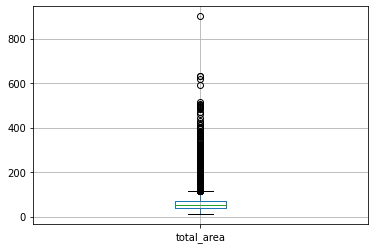

In [33]:
df.boxplot('total_area')

In [34]:
# видим бяку. прикидываем нормальные значеня и чистим по ним
normal_value_area = (69.875 - 40.0)*1.5 + 69.875
df = df.query('total_area <= @normal_value_area')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Лучше использовать переменные вместо констант. Это убережет от опечаток. </div>

<span style="color:orange"> Наверно имелось ввиду наоборот константу... я использовал переменную `normal_value_area`. мысль понял, но так прикольнее выглядит </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
`(69.875 - 40.0)*1.5 + 69.875` вот про эти я говорила. Почему лучше не прописывать вручную? Потому что может быть так, что чуть выше ты внесешь корректировку в этот столбец, а третий квартиль уже будет иметь другое значение. Придется переделывать. Из метода describe тоже можно вытаскивать данные:
   
</div>

In [35]:
# КОД РЕВЬЮЕРА 

display(df['total_area'].describe())

print('75%: ', df['total_area'].describe().loc['75%'])

count    22458.000000
mean        54.362474
std         19.382328
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        114.600000
Name: total_area, dtype: float64

75%:  65.6


In [36]:
df['rooms'].value_counts()

1    8027
2    7901
3    5442
4     792
0     214
5      72
6       9
7       1
Name: rooms, dtype: int64

In [37]:
df = df.query('rooms <= 5')

<AxesSubplot:>

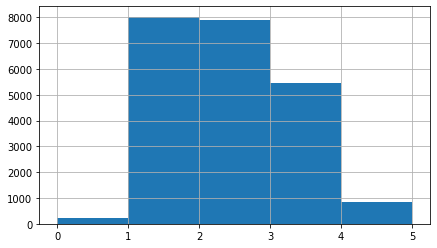

In [38]:
df['rooms'].hist(bins=5, range=(0, 5), figsize=(7, 4))

<AxesSubplot:>

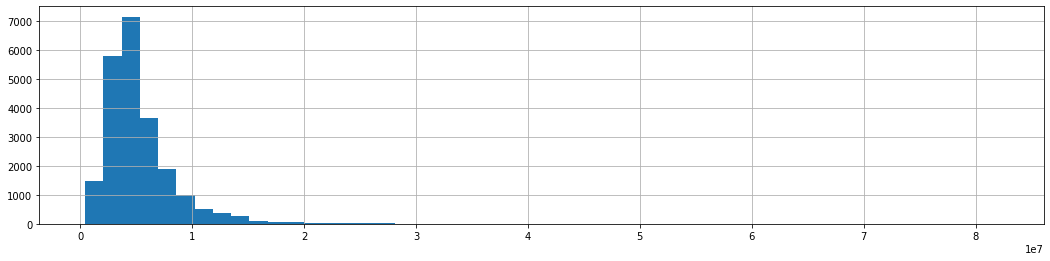

In [39]:
df['last_price'].hist(bins=50,figsize=(18,4))

In [40]:
df['last_price'].describe()
max_normal_price = ((6300000 - 3355000)*1.5 + 6300000)*2
df = df.query('last_price <= @max_normal_price')

<AxesSubplot:>

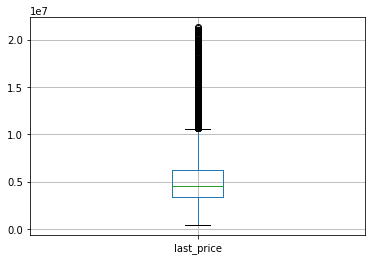

In [41]:
df.boxplot('last_price')  # Boxplot выглядит нормально.


In [42]:
df['ceiling_height'].describe()

count    13523.000000
mean         2.698260
std          0.241987
min          2.200000
25%          2.500000
50%          2.630000
75%          2.760000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

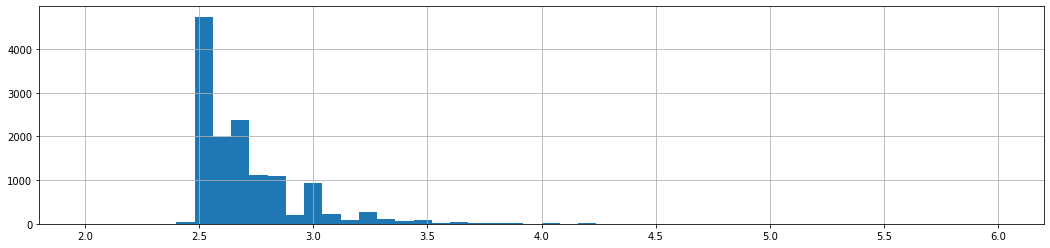

In [43]:
df['ceiling_height'].hist(bins=50,figsize=(18,4), range=(2, 6))

In [44]:
# Тут удалять 1.5 межквартильного размаха не хочется... оставим до 4 метров выборку(В Питере все таки попадаются старые дома с высокими полками)
# df = df.query('ceiling_height <= 4') Код прошлого варианта
df = df[(df['ceiling_height'].isna()) | (df['ceiling_height'] <= 4)]

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера  2 ❌</b>
    
Так мы потеряем около 10 тысяч строк с пропусками в потолках.</div>

<span style="color:orange"> Но нули оставил. не хочу медианным значением заполнять. а можно как то через метод `query` это повторить, чтоб сохранялись нули(ну или вообще метод какой то использовать, который возвращает булевый массив)?</span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Добавить проверку на пустоту это хорошее решение. Все-таки в этих строках, несмотря на пропуск в столбце высоты потолка, есть и другая, не менее важная информация.    
</div>

[Вернуться к содержанию](#main_title)

### Время продажи квартиры <a id='sell_time'></a>

<AxesSubplot:>

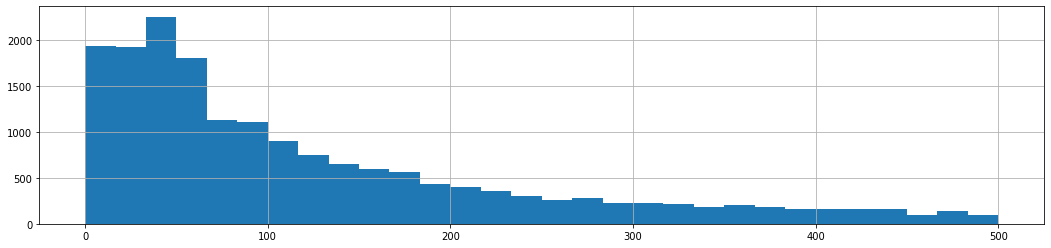

In [45]:
df['days_exposition'].hist(figsize=(18,4),bins=30, range=(0,500))

In [46]:
df['days_exposition'].describe()

count    19477.000000
mean       174.574935
std        212.488641
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

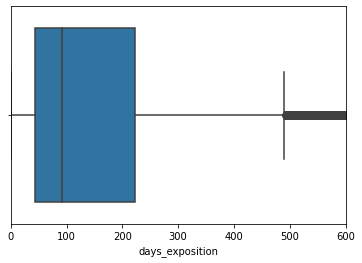

In [47]:
sns.boxplot(x=df['days_exposition'])
plt.xlim(0,600)
plt.show()

**Промежуточный вывод**  
Медианное время продажи квартиры ~~95~~ 93 дней, свыше 225 ~~230~~ дней можно считать долгим. Время продажи свыше 450 ~~500~~ дней - очень долго... 
продажи которые прошли менее чем за полтора месяца : можно считать быстрыми.

In [48]:
df.reset_index(drop=True, inplace=True)  # Обновил индексы... ну так чтоб красиво было.

[Вернуться к содержанию](#main_title)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Согласна. 
    
    
    
Проверим себя:</div>

In [49]:
# КОД РЕВЬЮЕРА

df[['last_price', 'total_area','rooms']].describe().loc[['min', 'max']]

,last_price,total_area,rooms
min,430000.0,12.0,0.0
max,21300000.0,114.6,5.0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ⚠️ </b>
    
Не все, что за усами, это выбросы. Равно как не все, что в их пределах, это не выбросы. Потому что ус идет либо до максимума (минимума), либо до 1.5 длины ящика. Концентрация кружков после уса очень велика. Срезая по усам, можем иногда потерять важную информацию, выборка-то у нас смещена. 
    
        
    
- 11 млн это не такая уж и большая цена для Питера. 2 комнаты в 70 метров в неплохом районе, недалеко от метро и с неплохим ремонтом. Даже не 3 комнаты. Желательно срезать с запасом, там, где концентрация кружков падает. Это будет где-то 20-25 млн. Так мы учтем почти все сегменты жилья. Особенно это касается анализа центра, где в принципе цены идут от 7-8 млн.
    
    
- То же самое касается и площади, там тоже можно взять с запасом. 
    
    
- Нули в комнатах могут относиться к студиям. Думаю, дело тут в том, что комната, совмещенная с кухней, не считается комнатой по документам.  Тут все нормально.
</div>

<span style="color:orange"> Согласен. взял цены до ~21.5млн </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Да, так больше сегментов жилья захватим, но при этом не будем рассматривать неприлично дорогое жилье или жилье бизнес класса.    
</div>

### Зависимость стоимости <a id='price_depended'></a>

In [50]:
df[['total_area','price_one_metr','rooms','cityCenters_nearest']].corr()

,total_area,price_one_metr,rooms,cityCenters_nearest
total_area,1.000000,0.070015,0.792549,-0.170909
price_one_metr,0.070015,1.000000,-0.143477,-0.401659
rooms,0.792549,-0.143477,1.000000,-0.096863
cityCenters_nearest,-0.170909,-0.401659,-0.096863,1.000000


<AxesSubplot:xlabel='rooms', ylabel='price_one_metr'>

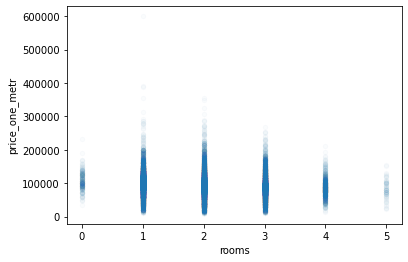

In [51]:
df.plot(y='price_one_metr', x='rooms', kind='scatter', alpha=0.02)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Коэфф-т корреляции Пирсона это коэфф-т линейной связи. Ее отсутствие не влечет отсутствие связи как таковой, поскольку последняя может быть нелинейной. Молодец, что еще и на графики смотришь. 
</div>

<AxesSubplot:xlabel='rooms', ylabel='price_one_metr'>

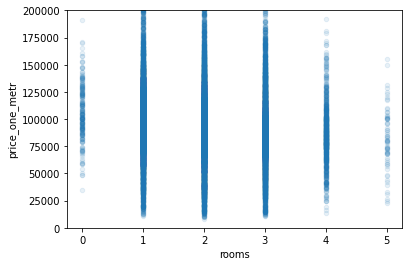

In [52]:
df.plot(y='price_one_metr', x='rooms', kind='scatter', alpha=0.1, ylim=(00000,200000))

<AxesSubplot:xlabel='total_area', ylabel='price_one_metr'>

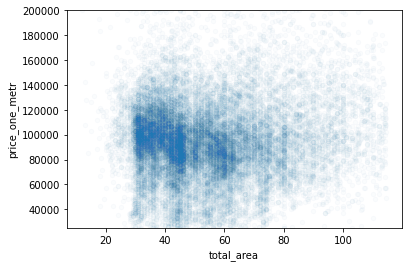

In [53]:
df.plot(y='price_one_metr', x='total_area', kind='scatter', alpha=0.02, ylim=(25000,200000))

Вообщем корреляция Пирсона дает более понятный ответ, зависимость между кол-вом комнат и стоимостью есть, но не сильная. (студии подороже чем квартира разбитая на большое кол-во комнат)
Ну также ооочень слабая зависимость видна: что маленькие квартиры в среднем имеют более дорогую стоимость за кв.м., связанно скорее всего с ликвидностью такого жилья.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
    
> корреляция Пирсона дает более понятный ответ, зависимость между кол-вом комнат и стоимостью есть, но не сильная.    
    
Точечная диаграмма хороша тогда, когда надо увидеть количество или разброс. Если хочешь посмотреть динамику, бери обычную кривую, потому что точек у зависимой переменной (комант) немного.</div>

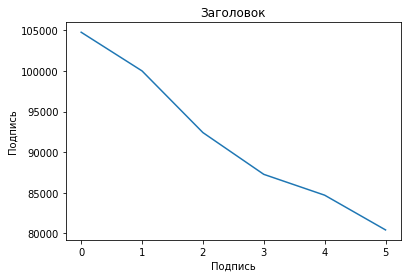

In [54]:
# КОД РЕВЬЮЕРА


df.groupby('rooms')['price_one_metr'].median().plot()


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись') 
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ✔️</b>
    
Так зависимость увидеть проще. А коэфф-т 0.2 это очень слабая связь. 0.1 - ее отсутствие.
</div>

In [55]:
df_test = df.copy()

In [56]:
df_test = pd.get_dummies(df_test, columns=['category_floor'])  # Делаем столбцы с разными категориями этажности для анализа
df_test[['category_floor_Первый',
    'category_floor_Другой', 'category_floor_Заключительный']].corrwith(df.price_one_metr)

# df = pd.get_dummies(df, columns=['category_floor'])  # Делаем столбцы с разными категориями этажности для анализа
# df[['category_floor_Первый',
#     'category_floor_Другой', 'category_floor_Заключительный']].corrwith(df.price_one_metr)

category_floor_Первый           -0.171257
category_floor_Другой            0.207379
category_floor_Заключительный   -0.100164
dtype: float64

In [57]:
df.groupby('category_floor')['price_one_metr'].median()

category_floor
Другой            97285.012285
Заключительный    86059.977858
Первый            80814.999308
Name: price_one_metr, dtype: float64

In [58]:
df_test = df.groupby('category_floor')['price_one_metr'].median()

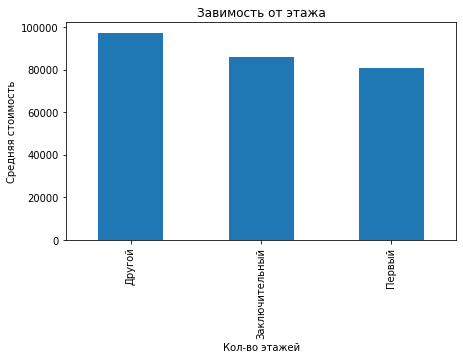

In [59]:
df.groupby('category_floor')['price_one_metr'].median().plot(
    kind='bar', title='Завимость от этажа',
    xlabel='Кол-во этажей', ylabel='Средняя стоимость',
    figsize=(7,4))

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    
Вот тут уже мы с большей уверенностью можем делать вывод.    
</div>

In [60]:
df['category_floor_dummies'] = df['category_floor'].copy()
df = pd.get_dummies(df, columns=['category_floor_dummies'])  # Делаем столбцы с разными категориями этажности для анализа
df[['category_floor_dummies_Первый',
    'category_floor_dummies_Другой', 'category_floor_dummies_Заключительный']].corrwith(df.price_one_metr)

category_floor_dummies_Первый           -0.171257
category_floor_dummies_Другой            0.207379
category_floor_dummies_Заключительный   -0.100164
dtype: float64

Корреляция прослеживается, стоимость вполне адекватно распределилась сначала первые этажи(дешевые) -> последний() -> другие


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ❌</b>
    
    
> этажи(дешевые) -> последний() -> другие
    
    
На основе почти нулевого коэфф-та такой вывод сделать нельзя. Вернее можно, но он совсем не обязательно будет верным. 
    
Для этажей и времени размещения тоже построй кривые, пожалуйста. Или просто выведи медианы.</div>

<span style="color:orange"> Добавил медианы и график для этажей и стоимости метра... Время размещения далее</span>

In [61]:
df[['weekday', 'month', 'year']].corrwith(df.price_one_metr)

weekday   -0.013406
month     -0.004416
year       0.057895
dtype: float64

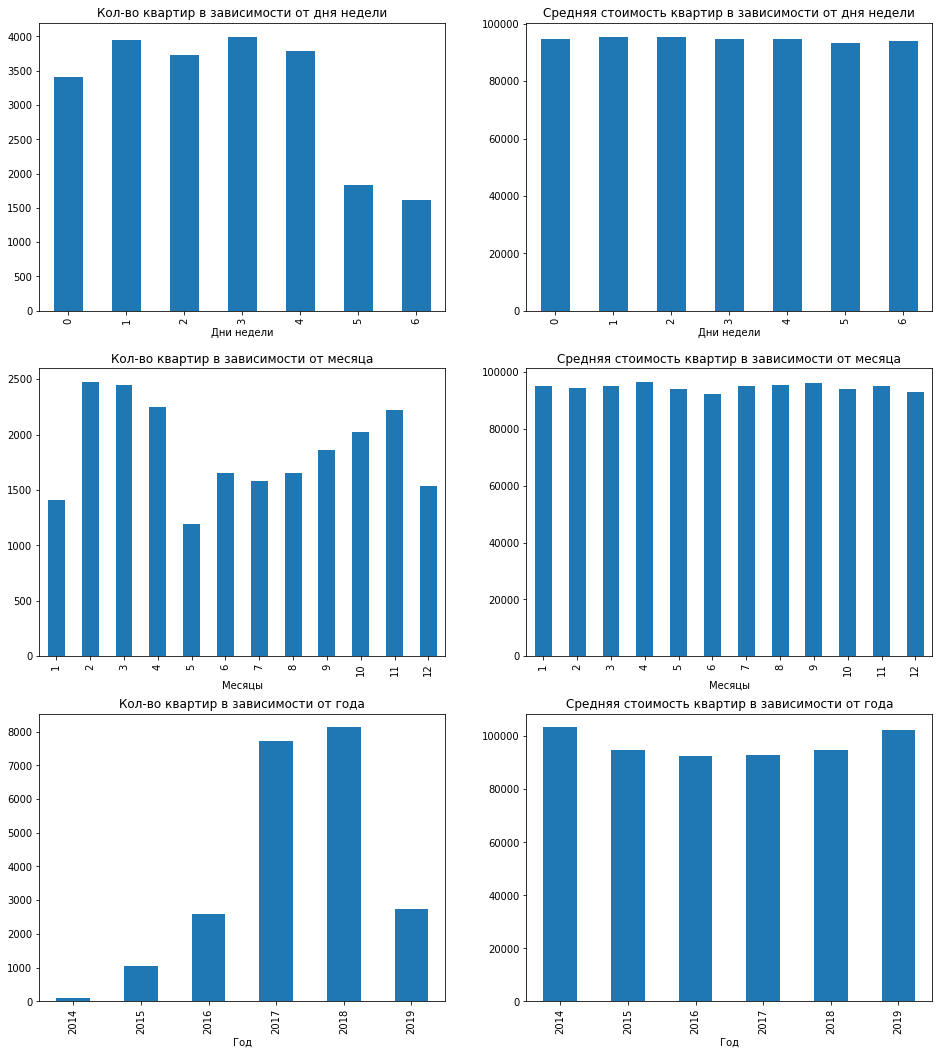

In [62]:
dictation = {
    'weekday' : ('Дни недели', 'дня недели', 1),
    'month' : ('Месяцы', 'месяца', 3),
    'year' : ('Год','года', 5)
}

for couple in dictation:
    # print(couple, dictation[couple][0])
    plt.subplot(3, 2, dictation[couple][2])
    df.groupby(couple)['price_one_metr'].count().plot(
        kind='bar', xlabel=dictation[couple][0],
        title=f'Кол-во квартир в зависимости от {dictation[couple][1]}',
        figsize=(8,18))
    plt.subplot(3, 2, dictation[couple][2]+1)
    df.groupby(couple)['price_one_metr'].mean().plot(
        kind='bar', xlabel=dictation[couple][0],
        title=f'Средняя стоимость квартир в зависимости от {dictation[couple][1]}',
        figsize=(16,18))
plt.show()

Если смотреть по корреляции: то зависимость не прослеживаться, но т.к. связь не линейная, то и не должна прослеживаться. По графикам единственно что прослеживается, что квартир выставляют больше и больше с каждым годом и в основном выставляются в будние дни. Также прослеживается тенденция по месяцам: в мае и январе(когда праздники) выставляют мало квартир, также есть просадка по среднему количеству выставляемых квартир в сезон отпусков.
~~Зависимости от даты и месяца публикации корреляция не особ прослеживается. а вот тендеция увеличения стоимости из года в год прослеживается.~~

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 3 ✔️ </h2>
    

Думаю, картина с месяцем и днем недели тянет на случайность. Ведь речь идет о дате размещения и о цене продажи. Разместить можно во вторник в мае, а продать в пятницу в ноябре, по более низкой цене. Это можно даже проверить, построив точно такие же графики для разных лет. Наверняка ситуация будет меняться. Хотя летом люди чаще думают об отпуске, чем о покупке квартиры, так что тут может быть связь. А вот год - да, вполне может влиять. Из года в год экономическая ситуация меняется, а вместе с ней и покупательская способность.

    
    
    
Здорово, что еще количество квартир выводишь. Это тоже важная информация. К примеру, видно, что за 2014 год в выборке очень мало данных. Хотя высокую стоимость тут объяснить легко: тогда было резкое повышение ключевой ставки и панические покупки недвижимости, из-за чего цены резко поднялись. Так  же, как это происходит сейчас. Зато потом стоимость упала. Хотя в основном стоимость падает на вторичном рынке, застройщики едва ли снижают стоимость. 
    
</div>

In [63]:
# Группируем по поселкам(взяли медианное значение стоимости)
df_local = df.pivot_table(
    index=['locality_name'], values='price_one_metr', aggfunc=['count', 'median'])
df_local.columns = ['count', 'median']
# Выбираем 10 поселков с наибольшим кол-вом данных
df_local = df_local.sort_values(by='count', ascending=False).head(10)
# Сортируем по медианной стоимости за кв.м
df_local.sort_values(by='median', ascending=False)


,count,median
locality_name,,
Санкт-Петербург,14427,103636.363636
Пушкин,345,99650.349650
деревня Кудрово,298,91831.871902
посёлок Парголово,326,91780.224134
посёлок Мурино,522,85878.462169
посёлок Шушары,437,76829.268293
Колпино,336,74723.748474
Гатчина,304,67860.569236
Всеволожск,393,65789.473684


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ❌</b>
    
Не забывай комментировать результаты. Где в итоге из топ-10 квартиры дешевле, и где они дороже?</div>

<span style="color:orange"> Ну мне кажется тут таблица очень наглядная... чтоб ее комментировать. дороже в Пушкино, Кудрово. но все равно Питер самый дорогой... в Выборге дешевле всего из 10 крупнейших пунктов... </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера  3 ✔️</h2>
    
Для нас с тобой да. А для заказчика может быть не ясно. Ведь он или она в коде разбираться не будет. Обычно отчет идет в виде презентации. В данном случае слайд будет выглядеть так: таблица и пара слов о том, что на ней отображено. Т.е. все равно надо будет прояснить, что count это число квартир, а второй столбец это медианная стоимость.</div>

[Вернуться к содержанию](#main_title)

### Зависимость стоимости от удалености к центру <a id='price_depended_centre'></a>

In [64]:
df_centre = df.query("locality_name == 'Санкт-Петербург'").dropna(subset=['cityCenters_nearest'])
df_centre['kilometers_to_centre'] = df_centre['cityCenters_nearest'].apply(lambda x: int(x/1000)) 
df_centre = df_centre.pivot_table(index='kilometers_to_centre', values='price_one_metr', aggfunc=['count','mean','median'])
df_centre.columns = ['count','mean','median']
df_centre[['mean','median']] = df_centre[['mean','median']].astype(int)

Видим что среднее от медианы не сильно отличается, разницы принципиальной нет по какому значению строить график

<AxesSubplot:xlabel='kilometers_to_centre', ylabel='mean'>

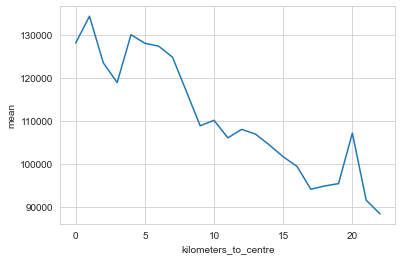

In [65]:
sns.set_style('whitegrid')
sns.lineplot(data=df_centre.query('kilometers_to_centre < 23'), y='mean', x='kilometers_to_centre')

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ❌</b>
    
Работоспособность ячеек тоже следует проверять :) Подправь, пожалуйста. </div>

<span style="color:orange"> Не очень понимаю комментарий.. все ячейки работают.</span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера  3 ✔️</h2>
    
Теперь все в норме. Проясню немного этот комментарий: до совсем недавнего времени здесь на сервере были несколько устаревшие версии библиотек, из-за чего иногда код с использованием seaborn не отрабатывал. Об этом должно было быть написано где-то в Ноушен. Точную ссылку дать не смогу, но можно спросить у куратора. Хотя вряд ли уже есть в этом смысл, ведь сейчас все обновлено и работает :)</div>

По графику видно, что чем ближе к центру, тем цена выше, довольно отчетливо видно, что максимальнай цена примерно до 7-8км от центра(по данным янд.недвижемости), далее цена медленно понижаться. есть всплеск в 20км, скорее всего это какое то элитное жилье, аля "Рублёвка" в экологически чистом районе.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Город не такой большой. 7 км захватит еще два-три района, помимо центра. Я тебе предлагаю взять меньший радиус, руководствуясь здравым смыслом: диаметр 14 км это как-то многовато.  Как ты считаешь? Понимаю, что формулировка сбивает, но все же :) 
</div>

<span style="color:orange"> Как посмотреть... если центральный район, то да, он меньше. А если центр как элитное жилье:  
-Можно сделать предположение что центром в Яндекс.Недвижимости является Гостинный двор  
-Согласно статье [статье](https://finance.rambler.ru/realty/43497090-nazvany-samye-dorogie-i-deshevye-rayony-peterburga/) к центральным и дорогим районом относятся: Петроградский, Центральный, Адмиралтейский, Василеостровский  
-Открыв [карту районов](https://www.google.ru/maps/d/viewer?mid=1n29fD3rIMAo5D1dGlmr6fLgB7jE&hl=en_US&ll=59.95513255407955%2C30.33341106480551&z=12) можно также посмотреть где они находятся. потом поиграться с яндекс.картами и линейкой и увидеть, что от центра центрального района до центра Петроградского как раз ~7000метров    
Таким образом наши данные со статьей вяжутся. хороший знак. Единственно если на восток от центра взять 7000метров, там не лучшие места... Но все таки обрежу согласно графику. </span>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера  3 ✔️</h2>
    
Да, я как раз про Восток и говорю. Город вытянут и там уже далеко не самые желанные районы расположены :) В целом, все верно. Петроградка по праву считается частью центра. А вот откуда брать центр города это еще вопрос. Можно с самой точки его основания, но мне кажется, что это не очень верно. На мой взгляд, лучше брать Адмиралтейство или около него. Но и тут со мной не каждый согласится. А чуть меньший радиус я предлагала брать просто для того, чтобы точно в самый центр попасть.</div>

In [66]:
df.query('cityCenters_nearest <= 7500')[['total_area', 'price_one_metr','rooms','ceiling_height']].describe()


,total_area,price_one_metr,rooms,ceiling_height
count,2624.000000,2624.000000,2624.000000,1658.000000
mean,68.401300,126887.393846,2.342226,3.019041
std,22.051525,38171.928381,0.955886,0.319823
min,12.000000,17391.304348,0.000000,2.400000
25%,50.075000,100000.000000,2.000000,2.800000
50%,68.000000,120026.232949,2.000000,3.000000
75%,85.000000,145667.701863,3.000000,3.200000
max,114.600000,392354.124748,5.000000,4.000000


<AxesSubplot:>

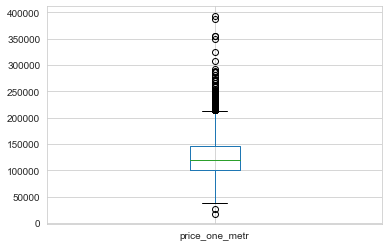

In [67]:
df.query('cityCenters_nearest <= 7500').boxplot('price_one_metr')

In [68]:
# Отбросим выбросы
df.query('cityCenters_nearest <= 7500 and price_one_metr >= 60000 and price_one_metr <=190000')[
    ['total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corrwith(df.price_one_metr)

total_area            -0.246126
rooms                 -0.384425
ceiling_height        -0.053926
cityCenters_nearest    0.062086
dtype: float64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Вроде чистили выше. Но ничего страшного, лишним не будет.</div>

Очень интересно... получается в маленьких квартирах стоимость за 1кв.м дороже, чем в большой квартире. и странно что практически отсутствует корреляция с высотой потолка и вообще она обратная: выше потолок - меньше стоимость. удаленности от центра на таком расстояние не сильно влияет на стоимость. Хотя если сделать выборку по удаленности менее 4500 метров - то там корреляция будет отрицательная.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ❌</b>
    
Добавь, пожалуйста, графики. Не забудь рассмотреть категории этажей и дату размещения (день, месяц и год). </div>

<span style="color:orange"> Добавлены выше </span>

In [69]:
df.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'price_one_metr', 'weekday', 'month', 'year', 'weekday_names',
       'category_floor', 'living_balance', 'kitchen_balance',
       'category_floor_dummies_Другой',
       'category_floor_dummies_Заключительный',
       'category_floor_dummies_Первый'],
      dtype='object')

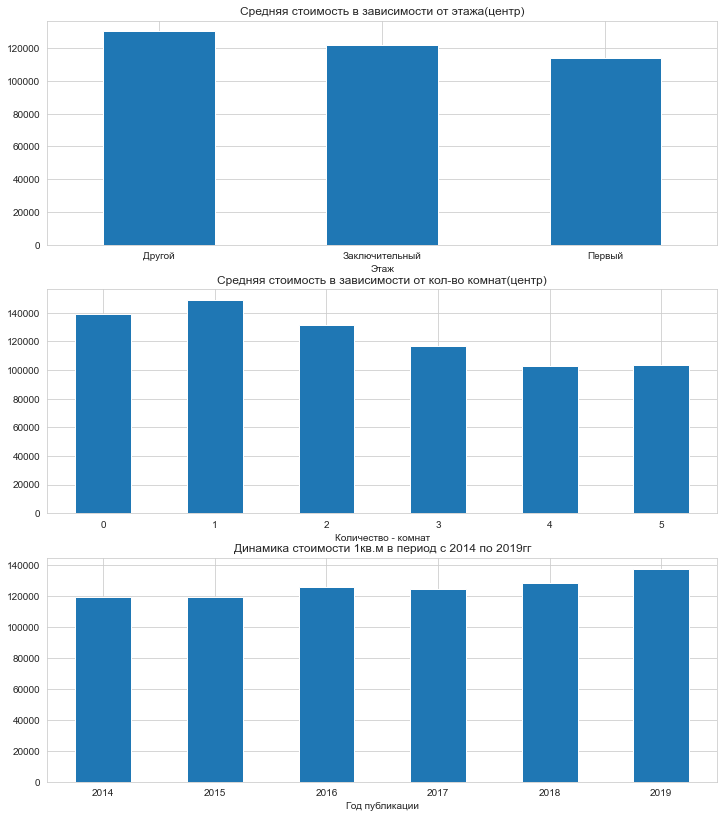

In [75]:
plt.subplot(3,1,1)
df.query('cityCenters_nearest <= 7500').groupby('category_floor')['price_one_metr'].mean().plot(
    kind = 'bar', xlabel='Этаж', title=f'Средняя стоимость в зависимости от этажа(центр)', rot=0)
plt.subplot(3,1,2)
df.query('cityCenters_nearest <= 7500').groupby('rooms')['price_one_metr'].mean().plot(
    kind = 'bar', xlabel='Количество - комнат', title=f'Средняя стоимость в зависимости от кол-во комнат(центр)', rot=0)
plt.subplot(3,1,3)
df.query('cityCenters_nearest <= 7500').groupby('year')['price_one_metr'].mean().plot(
    kind = 'bar', xlabel='Год публикации', title=f'Динамика стоимости 1кв.м в период с 2014 по 2019гг',
    figsize=(12,14), rot=0)
plt.show()

<span style="color:orange"> Изобразил... но в целом он отображает и повторяет выводы, общие для общего массива данных:  
в однушках цена за метр больше, распределение стоимости в зависимости от этажа в центре такое же, как и "в целом по больнице":  
- не первый и не заключительный ->
- заключительный ->
- первый </span>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 3 ❌</b>
    
Я имею в виду для центра :) Нам надо центр точно так же проанализировать. Коэфф-т корреляции, о чем мы уже говорили, это не самая надежная штука в данном случае. Поэтому для оценки зависимости цены в центре от комнат, категории этажа и года размещения (месяц и день не беру в расчет, оставила по этому поводу комментарий выше) стоит изобразить графики. Сделаешь?</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 4 ❌</h2>
    
Год размещения ведь тоже нужен :)

[Вернуться к содержанию](#main_title)

### Ликвидность квартир в центре <a id='liquid_centre'></a>

In [240]:
df_centre_liquid = df.query('cityCenters_nearest <= 7500 and price_one_metr >= 60000 and price_one_metr <=190000')
df_centre_liquid['total_area_category'] = pd.qcut(df_centre_liquid['total_area'], q=10)

C:\Users\Bacek\AppData\Local\Temp/ipykernel_14904/2030603361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centre_liquid['total_area_category'] = pd.qcut(df_centre_liquid['total_area'], q=10)


In [241]:
df_pivot_liquid = df_centre_liquid.pivot_table(
    index=['total_area_category'], values=['price_one_metr','days_exposition'], aggfunc=['mean', 'median'])
df_pivot_liquid


mean                         median  \
                    days_exposition price_one_metr days_exposition   
total_area_category                                                  
(12.999, 40.92]          124.393519  135450.765348            61.5   
(40.92, 47.0]            208.020492  131114.677070           111.5   
(47.0, 54.56]            219.163551  122932.112308           111.0   
(54.56, 61.0]            191.140187  120185.596545            96.5   
(61.0, 68.0]             229.990698  120637.835315           120.0   
(68.0, 74.0]             264.247573  119952.821986           156.5   
(74.0, 82.0]             221.402778  113899.657020           145.5   
(82.0, 90.0]             229.598086  115291.451238           138.0   
(90.0, 99.5]             306.142857  113390.487425           206.5   
(99.5, 114.6]            302.487685  112055.280339           201.0   

                                    
                    price_one_metr  
total_area_category                 
(12.999, 40.92]      132911.392405  
(40.92, 47.0]        129268.292683  
(47.0, 54.56]        120625.000000  
(54.56, 61.0]        119672.131148  
(61.0, 68.0]         115384.615385  
(68.0, 74.0]         114864.864865  
(74.0, 82.0]         106250.000000  
(82.0, 90.0]         108518.086348  
(90.0, 99.5]         105913.978495  
(99.5, 114.6]        108094.768016

[Вернуться к содержанию](#main_title)

## Общий вывод <a id="conlusion"></a>

Изучив данные можно сделать следующие выводы: 
1. Отсутствуют некоторые важные параметры для определения стоимости(во первых состояние квартиры)
2. Квартиры низкой площади более ликвидны (видно что и быстрее продаются и стоимость за квадратный метр больше)
3. Выделен центр - примерно 7500метров (по данным яндексНедвижисоти)
4. Средняя стоимость даже в самой дорогом городе Лен.области(г.Пушкин) не превышает средней стоимости жилья в Санкт-Петербурге
5. Таблица почищена...
6. Зависимости от месяца и дня недели не наблюдается, однако наблюдает небольшая зависимоть: больше год - больше стоимость
7. Этажность квартиры влияет. Вообщем не зря на популярных сервисах продажи недвижимости есть фильтры ("не первый", "не заключительный")
8. Разбивка квартиры на большое кол-во комнат - плохое капитоловложение
9. Странно корреляция между высотой потолкой и стоимостью не особ прослеживается.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера  2 ⚠️</b>
    
Вывод хороший. В идеале стоит добавить медианы основных характеристик квартир для центра и для всей выборки, чтобы заказчику было понятно не только то, что квартиры в центре больше и дороже, но и насколько они больше и насколько дороже.
</div>

[Вернуться к содержанию](#main_title)

## Чек-лист готовности проекта <a id="check_list"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [х]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [х]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [х]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили." (сделано при изучении площади,цены, числа комнат,высот потолков)
- [х]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [х]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [х]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [х]  в каждом этапе есть выводы
- [х]  есть общий вывод

[Вернуться к содержанию](#main_title)